In [2]:
# Importamos librerías de análisis de datos
import numpy as np
import pandas as pd

# plots
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline


In [3]:
# Cargamos el dataframe
df = pd.read_csv('train.csv', index_col='id', parse_dates=['fecha'])

In [4]:
# nos quedamos con las columnas que nos interesan
df = df[['tipodepropiedad', 'habitaciones', 'garages', 'banos', 'precio', 'fecha']]
df['anio'] = df['fecha'].dt.year
df.head(10)

,tipodepropiedad,habitaciones,garages,banos,precio,fecha,anio
id,,,,,,,
254099,Apartamento,2.0,1.0,2.0,2273000.0,2015-08-23,2015
53461,Casa en condominio,3.0,2.0,2.0,3600000.0,2013-06-28,2013
247984,Casa,3.0,2.0,2.0,1200000.0,2015-10-17,2015
209067,Casa,2.0,1.0,1.0,650000.0,2012-03-09,2012
185997,Apartamento,2.0,1.0,1.0,1150000.0,2016-06-07,2016
126147,Apartamento,2.0,1.0,1.0,1100000.0,2014-03-18,2014
139233,Casa,3.0,1.0,2.0,1150000.0,2016-02-23,2016
5013,Casa,4.0,2.0,3.0,4200000.0,2016-10-20,2016
44962,Apartamento,2.0,1.0,1.0,310000.0,2014-01-06,2014


Text(0,0.5,'Cantidad de habitaciones')

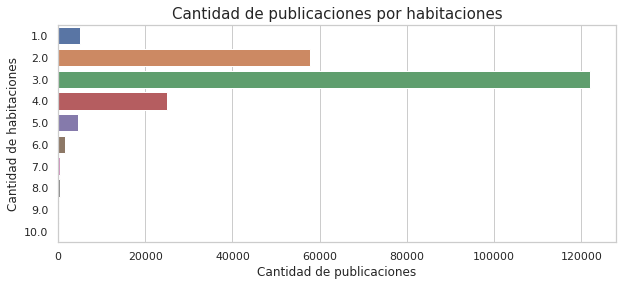

In [50]:
plt.figure(figsize=(10, 4))
gr = sns.barplot(x=df.habitaciones.value_counts().values , y=df.habitaciones.value_counts().index, orient='h')
gr.set_title("Cantidad de publicaciones por habitaciones", fontsize=15)
gr.set_xlabel("Cantidad de publicaciones", fontsize=12)
gr.set_ylabel("Cantidad de habitaciones", fontsize=12)

Text(0,0.5,'Cantidad de garages')

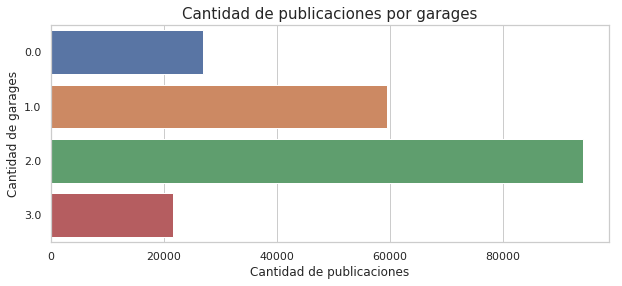

In [51]:
plt.figure(figsize=(10, 4))
gr = sns.barplot(x=df.garages.value_counts().values , y=df.garages.value_counts().index, orient='h')
gr.set_title("Cantidad de publicaciones por garages", fontsize=15)
gr.set_xlabel("Cantidad de publicaciones", fontsize=12)
gr.set_ylabel("Cantidad de garages", fontsize=12)

Text(0,0.5,'Cantidad de banos')

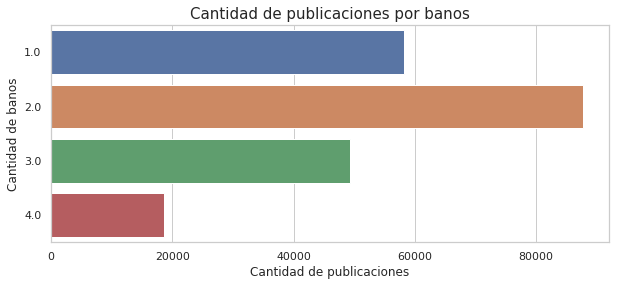

In [52]:
plt.figure(figsize=(10, 4))
gr = sns.barplot(x=df.banos.value_counts().values , y=df.banos.value_counts().index, orient='h')
gr.set_title("Cantidad de publicaciones por banos", fontsize=15)
gr.set_xlabel("Cantidad de publicaciones", fontsize=12)
gr.set_ylabel("Cantidad de banos", fontsize=12)

In [53]:
df.tipodepropiedad.value_counts()

Casa                             141717
Apartamento                       57341
Casa en condominio                19297
Terreno                            9945
Local Comercial                    3055
Oficina comercial                  1741
Bodega comercial                   1406
Edificio                           1396
Terreno comercial                  1326
Casa uso de suelo                   708
Quinta Vacacional                   395
Duplex                              343
Villa                               340
Inmuebles productivos urbanos       200
Rancho                              170
Local en centro comercial           165
Departamento Compartido             141
Otros                               134
Nave industrial                      76
Terreno industrial                   31
Huerta                               20
Lote                                  5
Garage                                1
Hospedaje                             1
Name: tipodepropiedad, dtype: int64

Text(0,0.5,'Cantidad de publicaciones')

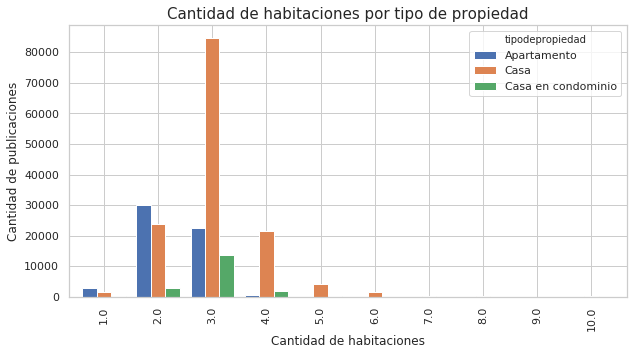

In [62]:
filtered = df[df['tipodepropiedad'].isin(df.tipodepropiedad.value_counts().head(3).index)]
ax = filtered.groupby('tipodepropiedad').habitaciones.value_counts().unstack(0).plot.bar(figsize=(10,5),width=0.8)
ax.set_title("Cantidad de habitaciones por tipo de propiedad", fontsize=15)
ax.set_xlabel("Cantidad de habitaciones", fontsize=12)
ax.set_ylabel("Cantidad de publicaciones", fontsize=12)

Text(0,0.5,'Cantidad de publicaciones')

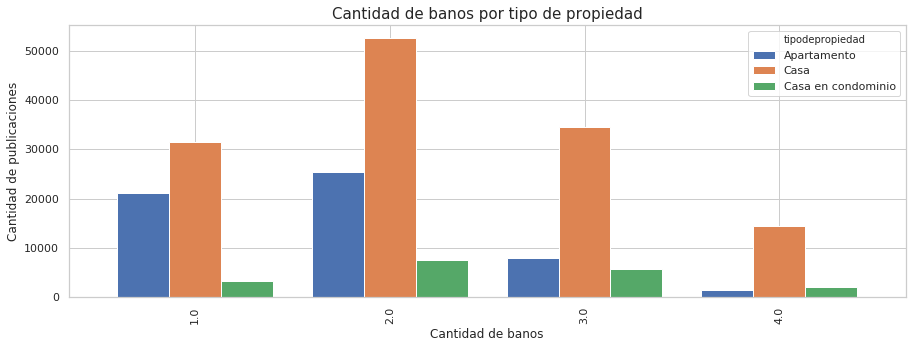

In [61]:
filtered = df[df['tipodepropiedad'].isin(df.tipodepropiedad.value_counts().head(3).index)]
ax = filtered.groupby('tipodepropiedad').banos.value_counts().unstack(0).plot.bar(figsize=(15,5),width=0.8)
ax.set_title("Cantidad de banos por tipo de propiedad", fontsize=15)
ax.set_xlabel("Cantidad de banos", fontsize=12)
ax.set_ylabel("Cantidad de publicaciones", fontsize=12)

Text(0,0.5,'Cantidad de publicaciones')

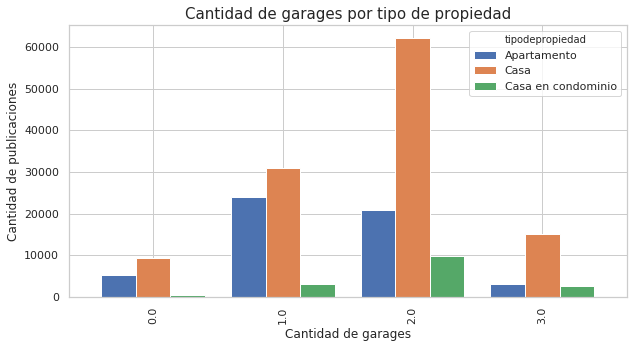

In [64]:
filtered = df[df['tipodepropiedad'].isin(df.tipodepropiedad.value_counts().head(3).index)]
ax = filtered.groupby('tipodepropiedad').garages.value_counts().unstack(0).plot.bar(figsize=(10,5),width=0.8)
ax.set_title("Cantidad de garages por tipo de propiedad", fontsize=15)
ax.set_xlabel("Cantidad de garages", fontsize=12)
ax.set_ylabel("Cantidad de publicaciones", fontsize=12)

In [55]:
df_habitaciones = df.groupby(['habitaciones', 'anio']).agg({'precio':'mean'})
df_habitaciones['precio'] = df_habitaciones['precio'].round(2)
df_habitaciones = df_habitaciones.unstack()
df_habitaciones

precio                                                
anio                2012        2013        2014        2015        2016
habitaciones                                                            
1.0           1303236.67  1457964.94  1571561.06  1908573.81  2021207.47
2.0           1142163.42  1224641.27  1443935.80  1768443.24  1866842.32
3.0           2233733.94  2352197.96  2557738.39  2888619.10  3064828.69
4.0           2927089.13  3107254.70  3366966.80  3565262.81  3761641.99
5.0           2652972.17  2891516.52  3072803.05  3267101.02  3681379.11
6.0           2890010.71  2980332.73  3087732.83  3319542.50  3259230.61
7.0           2875562.71  2676288.14  3481676.14  3782023.70  3917687.32
8.0           2981645.00  2660250.00  3173012.08  3741158.44  3681223.58
9.0           3550000.00  2824761.90  4036176.47  4864459.46  3820283.52
10.0          4590769.23  4056352.94  4311470.59  4478136.97  4727462.01

Text(0,0.5,'Precio')

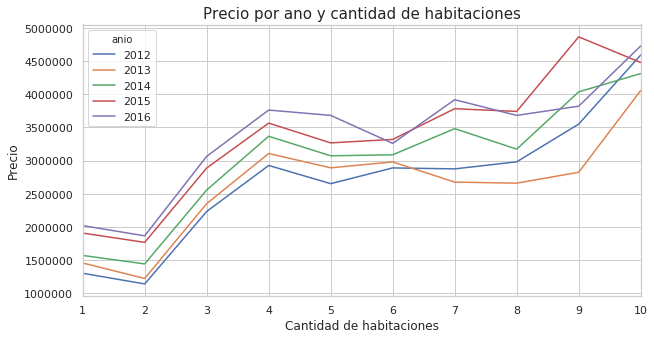

In [82]:
ax = df_habitaciones.droplevel(axis=1, level=0).plot(figsize=(10,5))
ax.set_title("Precio por ano y cantidad de habitaciones", fontsize=15)
ax.set_xlabel("Cantidad de habitaciones", fontsize=12)
ax.set_ylabel("Precio", fontsize=12)

In [83]:
df_garage = df.groupby(['garages','anio']).agg({'precio':'mean'})
df_garage['precio'] = df_garage['precio'].round(2)
df_garage = df_garage.unstack()
df_garage

precio                                                
anio           2012        2013        2014        2015        2016
garages                                                            
0.0      1820013.32  1826255.26  1964085.72  2059476.79  2225265.86
1.0      1049494.74  1095120.08  1306234.84  1418474.71  1515236.24
2.0      2066894.87  2185195.56  2434069.47  2740783.30  2999444.58
3.0      3387392.23  3632032.86  3966577.93  4545359.79  4763671.61

Text(0,0.5,'Precio')

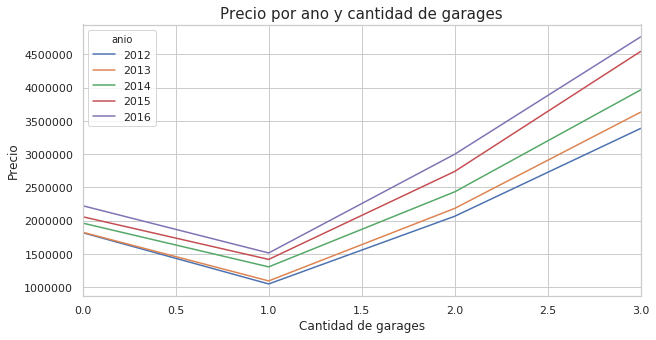

In [84]:
ax = df_garage.droplevel(axis=1, level=0).plot(figsize=(10,5))
ax.set_title("Precio por ano y cantidad de garages", fontsize=15)
ax.set_xlabel("Cantidad de garages", fontsize=12)
ax.set_ylabel("Precio", fontsize=12)

In [85]:
df_banos = df.groupby(['banos', 'anio']).agg({'precio':'mean'})
df_banos['precio'] = df_banos['precio'].round(2)
df_banos = df_banos.unstack()
df_banos

precio                                                
anio         2012        2013        2014        2015        2016
banos                                                            
1.0     817686.19   862242.32  1010226.84  1105495.21  1161254.05
2.0    1875016.90  1975956.60  2140369.11  2397025.46  2574189.62
3.0    3179730.70  3391847.40  3443145.30  3809576.89  3951803.51
4.0    3840742.35  4103021.28  4209173.05  4497657.01  4714358.45

Text(0,0.5,'Precio')

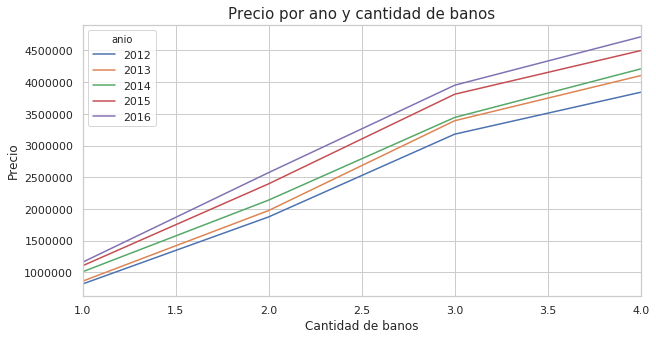

In [86]:
ax = df_banos.droplevel(axis=1, level=0).plot(figsize=(10,5))
ax.set_title("Precio por ano y cantidad de banos", fontsize=15)
ax.set_xlabel("Cantidad de banos", fontsize=12)
ax.set_ylabel("Precio", fontsize=12)

In [88]:
df_hab_ybanos = df.groupby(['habitaciones', 'banos', 'anio']).agg({'precio':'mean'})
df_hab_ybanos['precio'] = df_hab_ybanos['precio'].round(2)
df_hab_ybanos = df_hab_ybanos.unstack()
df_hab_ybanos.head()

precio                                                
anio                      2012        2013        2014        2015        2016
habitaciones banos                                                            
1.0          1.0    1127103.83  1320994.53  1474646.37  1837833.42  1842922.31
             2.0    2334819.49  2246966.67  2264622.80  2216903.59  3051989.62
             3.0    1540000.00  1631333.33  2393833.33  3528125.00  3443549.97
             4.0    2800000.00  3000000.00  3000000.00  3696666.67  4466250.00
2.0          1.0     679634.91   705344.21   850206.92   888282.63   928375.90

In [89]:
df['banos_por_habitaciones'] = df['banos']/df['habitaciones']
df_banos_por_hab = df.groupby(['banos_por_habitaciones', 'anio']).agg({'precio':'mean'})
df_banos_por_hab['precio'] = df_banos_por_hab['precio'].round(2)
df_banos_por_hab = df_banos_por_hab.unstack()
df_banos_por_hab.head()

precio                                     \
anio                          2012       2013        2014        2015   
banos_por_habitaciones                                                  
0.100000                 380000.00        NaN  1282500.00  1010000.00   
0.111111                4800000.00  1290000.0  2800000.00         NaN   
0.125000                1370000.00   915000.0  1643333.33  2750000.00   
0.142857                4358333.33  1500000.0  2902500.00  2778888.89   
0.166667                1318000.00  1253600.0  4081250.00  2141111.11   

                                    
anio                          2016  
banos_por_habitaciones              
0.100000                3997777.78  
0.111111                2203333.33  
0.125000                2799826.00  
0.142857                2678000.00  
0.166667                2694969.60